# The Green Team
### Group 37: Daisy Chen, Magda Videva, & Nikhita Vysyaraju

## Introduction

Introduce the project, your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.

Our project is determining the best neighborhood in Allegheny County by looking at various data sets related to pollution. The three datasets we used includes: Daily Air Quality Index in Allegheny County, Allegheny County Clean Air Act Exemptions, and Illegal Dump Sites in Allegheny. With the Daily Air Quality Index (AQI) in Allegheny County dataset, we created a daily average for all 13 sites by finding the mean for each site and compared the values using AQI ranges. For the Allegheny County Clean Air Act Exemptions dataset, we mapped out the neighborhoods with any exeptions from the act. Finally, we used the Illegal Dump Sites dataset to find which nieghborhoods in Pittsburgh have the least number of illegal dumping site and the least amount of trash in the neighborhood. In order to combine the datasets into one metric, we weighted each dataset by what we determined were the most affecting factors for narrowing down our neighborhood choices. We then added the dataframes together and created a bar chart to show us that the neighborhood with the least total value, was the best neighborhood.

## The Metric

### Clean Indoor Air Act Exemptions Dataset - Magda

The data set [Allegheny County Clean Indoor Air Act Exemptions](https://data.wprdc.org/dataset/allegheny-county-clean-indoor-air-act-exemptions) keeps track of establishments within Allegheny County that have received an exemption from the Pennsylvania Clean Indoor Air Act. The act is meant to protect residents from harmful effects of secondhand and thirdhand emmisions. The best neighborhood would surely care about the health of its citizens and the environment that hosts them. Since the signing of the act in 2008, 159 establishments have received exemptions, with more surely on the way, in the Pittsburgh area alone. Generated below is a heat map for the number of exceptions in each neighborhood, whose data has been collected from the cleanAirAct.csv. The South Side Flats are clearly identified as an outlier with its dark red hue. This neighborhood in particular is known to host a significant portion of Pittsburgh's nightlife, so it is understandable that the high concentration of entertainment establishments would have a high exemption rate.

In [1]:
import pandas as pd
import geopandas
import math
%matplotlib inline
import matplotlib.pyplot as plt

#data frame created
exemptions = pd.read_csv("cleanAirAct.csv")

exemptions.head(n = 159)

,Shape,Bus_Type,Status,Establishm,Trade_Name,Address,Neighborhood,City,State,ZIP,Latitude_A,Longitude_,DE_LID_Num,License_Nu
0,Point,Drinking Establishment Type I,Approved,"MORTBAR, INC.",NaN,3011 West Liberty Avenue,Allentown,Pittsburgh,PA,15216.0,40.392905,-80.037020,39819.0,R-10337
1,Point,Drinking Establishment Type I,Approved,"Gardeb, Inc.",R Bar,2883 West Liberty Avenue,Beechview,Pittsburgh,PA,15216.0,40.395219,-80.033531,61443.0,R-8000
2,Point,Drinking Establishment Type I,Approved,"Apple Inn, Inc.",Apple Inn,2895 West Liberty Avenue Dormont,Beechview,Pittsburgh,PA,15216.0,40.394829,-80.034232,12688.0,R-07348
3,Point,Drinking Establishment Type I,Approved,"Bedrock Cafe, Inc.","Bedrock Cafe, Inc.",604 Hampshire Avenue,Beechview,Pittsburgh,PA,15216.0,40.410765,-80.019251,51879.0,R-02696
4,Point,Drinking Establishment Type I,Approved,"Alpine LDA, Inc.",The Alpine,1544 Beechview Avenue,Beechview,Pittsburgh,PA,15216.0,40.411012,-80.025025,60492.0,R-9832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Point,Drinking Establishment Type I,Approved,"Hoople's, Inc.",Hoople's,2350 Railroad Street - Suite 100,Upper Lawrenceville,Pittsburgh,PA,15210.0,40.390766,-79.985881,42584.0,R-10266
155,Point,Drinking Establishment Type I,Approved,"Doug's Den, Inc.",Doug's Den,2301-03 Brownsville Road,Upper Lawrenceville,Pittsburgh,PA,15210.0,40.389305,-79.985024,42585.0,R-12642
156,Point,Drinking Establishment Type I,Approved,"DeGiroma, Inc.",Rocco's Inn,7105 Harrison Avenue,West End,Pittsburgh,PA,15218.0,40.422197,-79.897660,52661.0,R-16665
157,Point,Drinking Establishment Type I,Approved,The Ezra X Association,NaN,941 Liberty Ave 2nd Floor,West Oakland,Pittsburgh,PA,15222.0,40.443586,-79.996624,63329.0,CC-1489


In [2]:
#create data frame of two columns: neighborhood and occurence (found by shape metric)
num_exemptions = exemptions.groupby("Neighborhood").count()["Shape"]

#prints table of Pittsburgh's 90 neighborhoods and cooresponding number of exemptions
num_exemptions.sort_values(ascending = False)

Neighborhood
South Side Flats             22
Bloomfield                    8
Carrick                       8
Brookline                     7
Central Business District     6
Lower Lawrenceville           5
Middle Hill                   5
Homewood North                5
Strip District                5
Beechview                     5
Greenfield                    4
Central Oakland               4
Lincoln Lemington Belmar      4
Troy Hill                     4
Lincoln Place                 4
Marshall-Shadeland            4
North Oakland                 3
Upper Lawrenceville           3
Mount Washington              3
Central Lawrenceville         3
East Allegheny                3
Polish Hill                   3
Crawford Roberts              3
South Side Slopes             2
Overbrook                     2
Hazelwood                     2
Shadyside                     2
Brighton Heights              2
Homewood South                2
Central North Side            2
Crafton Heights            

Text(0.5, 1.0, 'Number of Clean Air Act Exemptions in Pittsburgh')

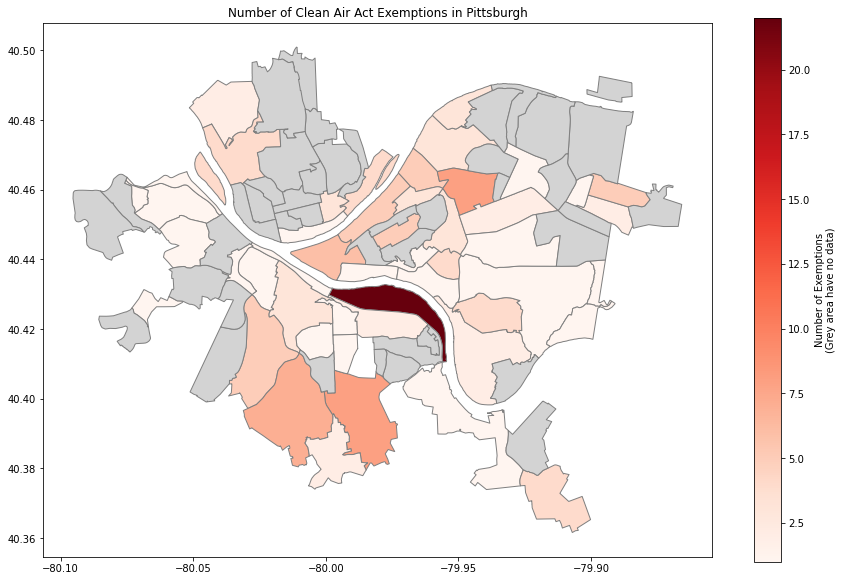

In [3]:
#create a map of Pittsburgh
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

#merge the neighborhood, occurences, and geometry
exemption_map = neighborhoods.merge(num_exemptions, how='left', left_on='hood', right_on='Neighborhood')

exemption_map.plot(column='Shape', # data to be used for coloring
               cmap='Reds',              # color palette
               edgecolor="grey",        # outline the districts in grey
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Exemptions\n(Grey area have no data)"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to lightgrey
               )
plt.title("Number of Clean Air Act Exemptions in Pittsburgh")

The dataset used was a list of exemtions from the Pennsylvania Clean Indoor Air Act based on which neighborhood they were located in. About two-thirds of the ninety neighborhoods had at least one exemption. The remaining third of the neighborhods had no exemptions listed at the time of collection. Due to this, the metric measured had to be simplified to purely a question of whether or not a there were any exemptions. If one were to rank the locations on exemptions, thirty-six neighborhoods would tie for first place with no exemptions listed. Therefore the dataset could only serve as an *eliminator* of neighborhoods rather than one that ranks. The thirty-six remaining neighborhoods who reportedly do not have exemptions and are candidates for the best Pittsburgh neighborhood are as follows:

- Allegheny Center
- Allegheny West
- Arlington
- Arlington Heights
- Banksville
- Bedford Dwellings
- Bon Air
- California-Kirkbride
- Chateau
- East Carnegie
- East Hills
- Fairywood
- Fineview
- Friendship
- Garfield
- Glen Hazel
- Highland Park
- Larimer
- Manchester
- Morningside
- Mount Oliver
- New Homestead
- Northview Heights
- Perry North
- Perry South
- Point Breeze
- Point Breeze North
- Ridgemont
- Spring Garden
- Spring Hill-City View
- St. Clair
- Stanton Heights
- Summer Hill
- Terrace Village
- Upper Hill
- Windgap

---

### **Illegal Dumpsites - Daisy:**
For my metric, I looked at a dataset from 2005 that includes data about illegal dump sites in the neighborhoods around the Pittsburgh area. Illegal dump sites can be caused by several things such as laziness, lack of control or regulations, or a shortage of proper waste facilities, which would affect the quality of living in a neighborhood. As a result, these illegal dump sites could lead to pollution in the air, soil, and water as well as bad smells, possible health risks if it contains toxic substances or infected needles, and could lead to diseases as harmful bacteria could grow in the waste. So, if a neighborhood has a large amount of waste and many dumpsites, it would not be considered the best neighborhood to live in. By using the data in this dataset, we determined which neighborhoods in Pittsburgh are the best based on which neighborhoods have the least amount of total estimated tons of trash and the least number of illegal dumping sites. Combining this with the other datasets, we can discover which the best neighborhood in Pittsburgh based on its overall cleaniness and environment. 

In [4]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
ds = pd.read_csv("illegaldumpsites.csv")

In [6]:
ds.dropna(subset=['estimated_tons'], inplace = True)
ds['estimated_tons']=pd.to_numeric(ds['estimated_tons'],errors='coerce')

This section of code imports pandas and geopandas, which is used to examine and represent the data. It also reads in the dataset about the illegal dumping sites. Since there were null values in the column containing the data about the estimated tons of trash, I removed those points from the data. In addition, the dataset stored these values as Strings so I convereted them into floats to be able to do calculations, like finding the sum, and also graph the data in different plots.

In [7]:
querymask_ds = ds['City'].str.startswith('Pittsburgh')
pitt = ds[querymask_ds]

This dataset included some data values from areas outside of Pittsburgh like Verona and Monroeville. However, since we are only trying to find the best neighborhood in Pittsburgh, I removed those data points from my dataset so that it would not affect the outcome of our conclusion or skew the data in any way.

Text(0, 0.5, 'Estimated Tons')

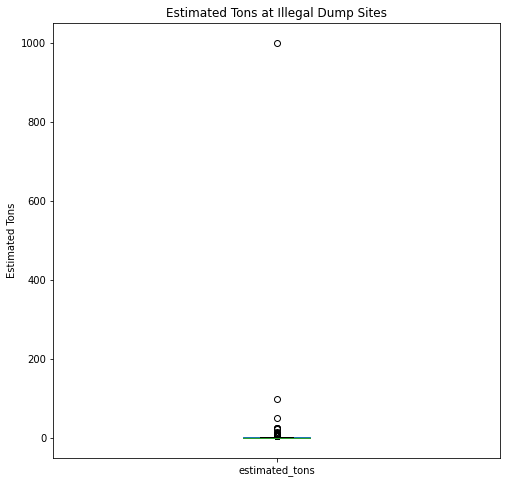

In [8]:
pitt['estimated_tons'].plot.box( title="Estimated Tons at Illegal Dump Sites", figsize =(8,8))
plt.ylabel("Estimated Tons")

This boxplot is an overview of the dataset after the data points that were not related to the city of Pittsburgh have been removed. Looking at the estimated tons at each dump site, there is a very obvious outlier around 1000 tons and another outlier is around 100 tons. These outliers greatly skew the data to the right and are not representative of the average. They are actually the opposite of what we are looking for in a neighborhood, so I removed these points to make the rest of the data more readable.

In [9]:
filtered_ds = pitt[pitt['estimated_tons']<100]

Text(0, 0.5, 'Estimated Tons')

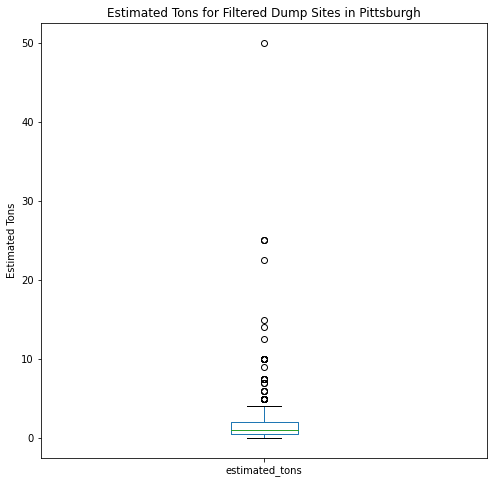

In [10]:
filtered_ds['estimated_tons'].plot.box(title="Estimated Tons for Filtered Dump Sites in Pittsburgh", figsize =(8,8))
plt.ylabel("Estimated Tons")

After removing the data points with over 100 tons of trash at the site, the boxplot better shows the average amount of trash found at these illegal dump sites. The average is close to around 1.5 tons. There are still some sites with far greater amounts of trash, which we would need to examinw further to remove in order to find the best neighborhood in Pittsburgh.

In [11]:
total_trash = filtered_ds.groupby("Neighborhood").sum()['estimated_tons']
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
dumpsites = neighborhoods.merge(total_trash, how='left', left_on='hood', right_on='Neighborhood')

Text(0.5, 1.0, 'Estimated Tons in Each Neighborhood in Pittsburgh')

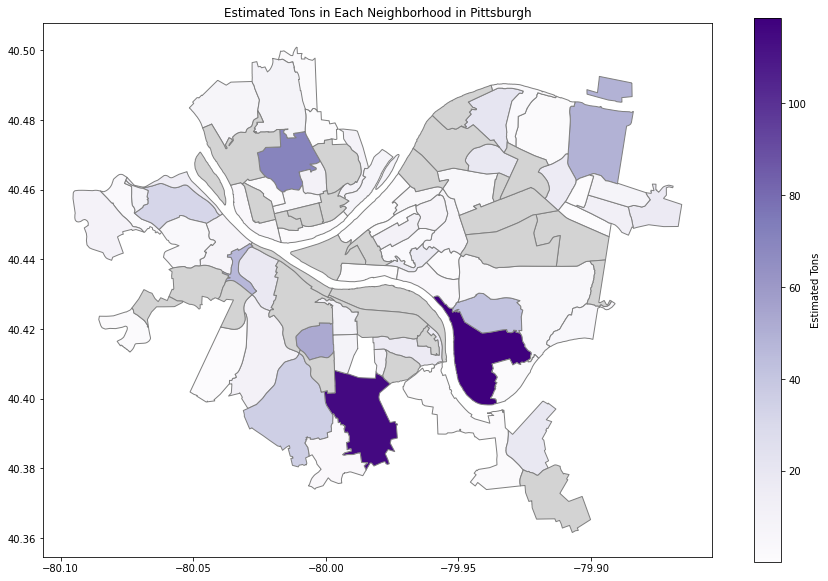

In [12]:
dumpsites.plot(column='estimated_tons', # set the data to be used for coloring
               cmap='Purples',              # choose a color palette
               edgecolor="grey",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Estimated Tons"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"},
               )
plt.title("Estimated Tons in Each Neighborhood in Pittsburgh")

By taking the sum of the estimated tons of trash at each site in the specific neighborhoods and showing it on the graph, there are a few places that stand out as not the best neighborhoods to live in by my metric. For example, Hazelwood and Carrick are dark purple, indicating that they contain lots of trash. Other places like Perry South and Beltzhoozer also have higher amounts of trash compared to some of the other neighborhoods.

Text(0, 0.5, 'Estimated Tons')

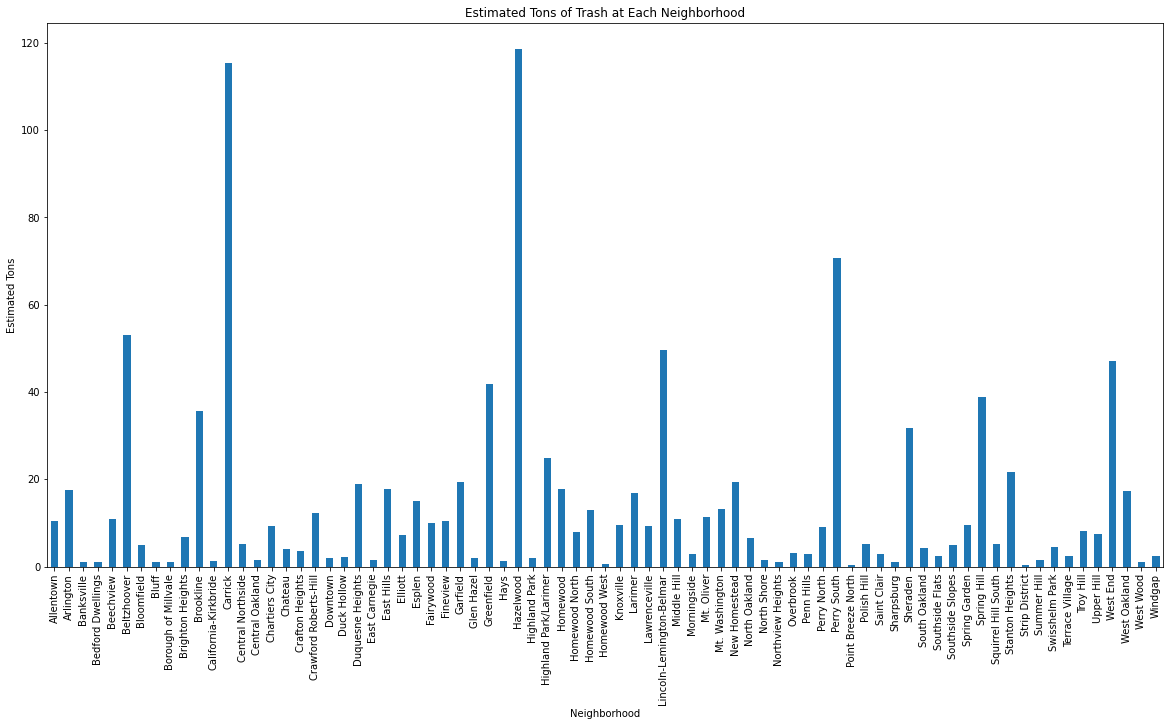

In [13]:
total_trash.plot(kind='bar', rot=90, figsize=(20,10), title = "Estimated Tons of Trash at Each Neighborhood")
plt.ylabel("Estimated Tons")

This is another representation of the previous graph that shows more concrete amount of trash at a given neighborhood. Again Hazelwood and Carrick are the obvious neighborhoods with the most amount of trash. Neighborhoods like Homewood West Point Breeze North, and the Strip District have the least amount of trash.

Text(0, 0.5, 'Number of Dumping Sites')

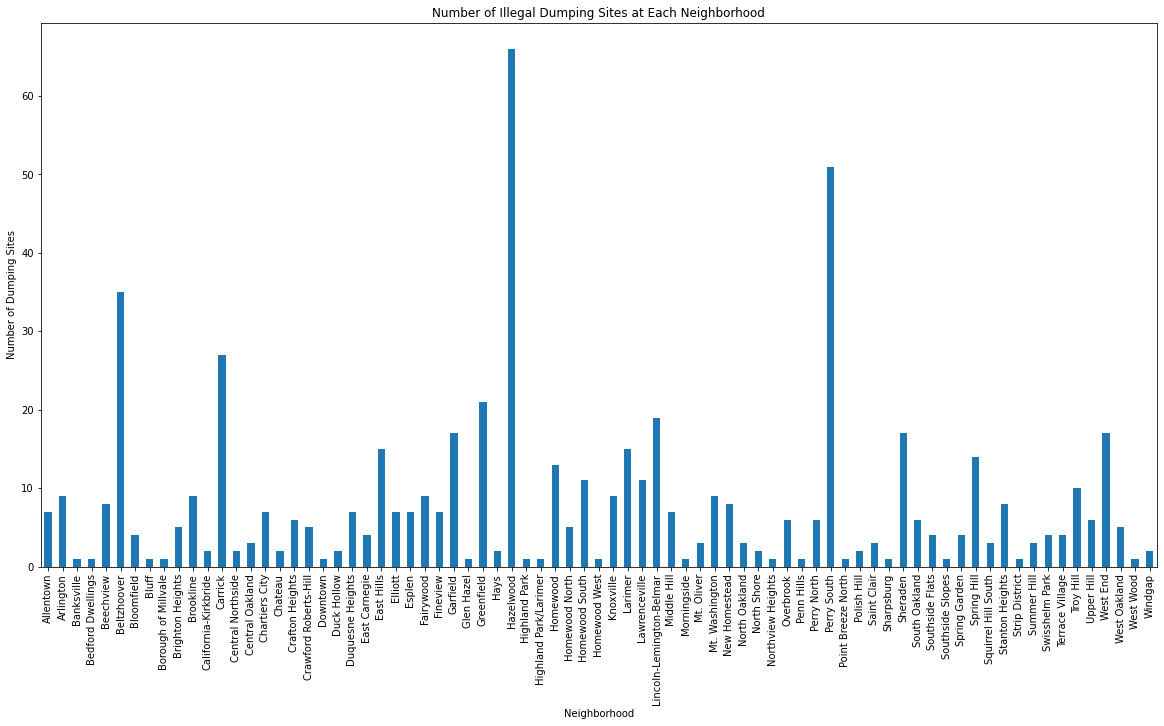

In [14]:
filtered_ds["Neighborhood"].value_counts().sort_index().plot(kind='bar', rot=90, figsize=(20,10), title = "Number of Illegal Dumping Sites at Each Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Dumping Sites")

One thing to consider is that neighborhoods with more illegal dumping sites might have more trash. So this graph shows the total number of illegal dumping sites. As you can see, Hazelwood, Perry South, Beltzhoover, and Carrick also have the most number of dumping sites and places like Point Breeze North and the Strip District have few dump sites. So this could explain why certain neighborhoods have more tons of trash compared to others. 

However, when considering the best neighborhood, I was looking for the neighborhood with the least number of illegal dumping sites as well as the least amount of trash in the area.  

In [15]:
filtered_ds['Neighborhood'].value_counts().sort_values(ascending=True).head(15)
# total number of dumpsites

Downtown               1
Strip District         1
Point Breeze North     1
Sharpsburg             1
Penn Hills             1
Highland Park          1
Southside Slopes       1
Borough of Millvale    1
Bedford Dwellings      1
Northview Heights      1
Morningside            1
Glen Hazel             1
West Wood              1
Banksville             1
Bluff                  1
Name: Neighborhood, dtype: int64

In [16]:
total_trash.sort_values(ascending=True).head(15)
# total amount of trash in a neighborhood

Neighborhood
Point Breeze North      0.3
Strip District          0.3
Homewood West           0.5
Bedford Dwellings       1.0
West Wood               1.0
Banksville              1.0
Sharpsburg              1.0
Borough of Millvale     1.0
Northview Heights       1.0
Bluff                   1.0
California-Kirkbride    1.3
Hays                    1.3
North Shore             1.5
Central Oakland         1.5
Summer Hill             1.6
Name: estimated_tons, dtype: float64

From these lists, we can narrow down which neighborhood is the best in Pittsburgh. The top loist sorts the neighborhoods in ascending order by the number of dumpsites. The second list then outputs the top 15 neighborhoods in PIttsburgh with the least amount of total trash in the area. By comparing the two lists, we can see the neighborhoods with the least amount of trash and the least number of dumpsites, which with my metric means that it would be the best neighborhood to live in. 

### Conclusion:
**Point Breeze North and the Strip District win.**
After looking at the data, we can see that there are a couple neighborhoods that fit the criteria of being the best neighborhood in Pittsburgh by my metric. Point Breeze North and the Strip District are tied for first because they contain the least amount of trash, with only 0.3 tons, and only one documented dumpsite. Places like Homewood West, Bedford Dwellings, West Wood, and Banksville are runners-up. They only have one dumpsite as well but have slightly more trash in the area compared to Point Breeze North and the Strip District. So, to conclude, Point Breeze North and the Strip District would be the best neighborhood to live in Pittsburgh from just my data because it would be cleaner, could mean that this neighborhood has a better waste management, and better quality of life with less pollution in the area.

---

### Air Quality Dataset - Nikhita
   The Air Quality in Allegheny County data set used two parameters: sites and the Air Quality Index (AQI). There are 13 main source sites used by the dataset to determine the daily average AQI value starting from 2016 to the present. The data set isn't consistent with recording values earlier on, but as it gets closer to the present, the recorded data is done almost every day. The Air Quality Index is a metric that determines how much the air pollution can affect living things. It has a range from 0 to 500, but the ranges that are most common are 0 to 50 (good air quality) and 50 to 100 (moderate air quality, but poses risk to some people). To easily compare all the sites, I found the means for each site and compared the values through a bar graph. 

In [51]:
# import necessary packages for graphing
import pandas as pd
import numpy as np
import geopandas as gpd

%matplotlib inline
import matplotlib.pyplot as plt

In [74]:
air = pd.read_csv("air-quality.csv")

air_quality = air.groupby("site").sum()["index_value"].sort_values(ascending=True)
air_quality

site
West Mifflin               1907
Clairton                   2393
Lawrenceville 2           13154
Pittsburgh                18965
Glassport High Street     36693
Flag Plaza                38289
Liberty                   40159
Avalon                    76392
North Braddock            79604
South Fayette             84915
Harrison Township         99475
Lincoln                  125476
Liberty 2                135101
Lawrenceville            140725
Parkway East             142316
Name: index_value, dtype: int64

In [75]:
# west mifflin avg SO2
q_mask1 = air['site'].str.startswith('West')

site1_SO2 = air[q_mask1]

avg_1 = site1_SO2['index_value'].mean()

In [76]:
# clairton avg SO2
q_mask2 = air['site'].str.startswith('Clairton')

site2_SO2 = air[q_mask2]

avg_2 = site2_SO2['index_value'].mean()

In [77]:
# lawrenceville avg SO2
q_mask3 = air['site'].str.startswith('Lawrenceville')

site3_SO2 = air[q_mask3]

avg_3 = site3_SO2['index_value'].mean()

In [78]:
# pittsburgh avg SO2
q_mask4 = air['site'].str.startswith('Pittsburgh')

site4_SO2 = air[q_mask4]

avg_4 = site4_SO2['index_value'].mean()

In [79]:
# glassport high st avg SO2
q_mask5 = air['site'].str.startswith('Glassport')

site5_SO2 = air[q_mask5]

avg_5 = site5_SO2['index_value'].mean()

In [80]:
# flag plaza avg SO2
q_mask6 = air['site'].str.startswith('Flag')

site6_SO2 = air[q_mask6]

avg_6 = site6_SO2['index_value'].mean()

In [81]:
# liberty avg SO2
q_mask7 = air['site'].str.startswith('Liberty')

site7_SO2 = air[q_mask7]

avg_7 = site7_SO2['index_value'].mean()

In [82]:
# avalon avg so2
q_mask8 = air['site'].str.startswith('Avalon')

site8_SO2 = air[q_mask8]

avg_8 = site8_SO2['index_value'].mean()

In [83]:
# north braddock avg s02
q_mask9 = air['site'].str.startswith('North')

site9_SO2 = air[q_mask9]

avg_9 = site9_SO2['index_value'].mean()

In [84]:
# south fayette avg so2
q_mask10 = air['site'].str.startswith('South')

site10_SO2 = air[q_mask10]

avg_10 = site10_SO2['index_value'].mean()

In [85]:
# harrison township avg so2
q_mask11 = air['site'].str.startswith('Harrison')

site11_SO2 = air[q_mask11]

avg_11 = site11_SO2['index_value'].mean()

In [86]:
# lincoln avg so2
q_mask12 = air['site'].str.startswith('Lincoln')

site12_SO2 = air[q_mask12]

avg_12 = site12_SO2['index_value'].mean()

In [87]:
# parkway east avg s02
q_mask13 = air['site'].str.startswith('Parkway')

site13_SO2 = air[q_mask13]

avg_13 = site13_SO2['index_value'].mean()

"West Mifflin","Lawrenceville",
                          "Lincoln","Parkway East","Harrison Township",
                         "Liberty", "North Braddock", "South Fayette",
                         "Flag Plaza", "Glassport High",
                         "Pittsburgh", "Clairton", "Avalon"

In [88]:
# averaged all the air quality values for each borough in allegheny
# borough = site of air quality data set
# use averages to make a bar graph with avgs + borough names

In [119]:
d = {"West Mifflin": [avg_1], "Clairton": [avg_2], 
     "Lawrenceville": [avg_3], "Pittsburgh": [avg_4],
    "Glassport": [avg_5], "Flag Plaza": [avg_6], 
    "Liberty": [avg_7], "Avalon": [avg_8], 
    "North Braddock": [avg_9], "South Fayette": [avg_10],
    "Harrison Township": [avg_11], "Lincoln": [avg_12], 
    "Parkway East": [avg_13]}
df1 = pd.DataFrame.from_dict(d, orient='index')
df = df1.sort_values(by=0,ascending=True)
df

,0
West Mifflin,6.335548
Clairton,7.273556
Flag Plaza,9.853062
Glassport,17.275424
North Braddock,17.981477
Lawrenceville,19.505514
South Fayette,20.630466
Avalon,20.674425
Parkway East,22.324078
Harrison Township,24.369182


[Text(0, 0.5, 'Average Air Quality Index'),
 Text(0.5, 0, 'Allegheny County Boroughs')]

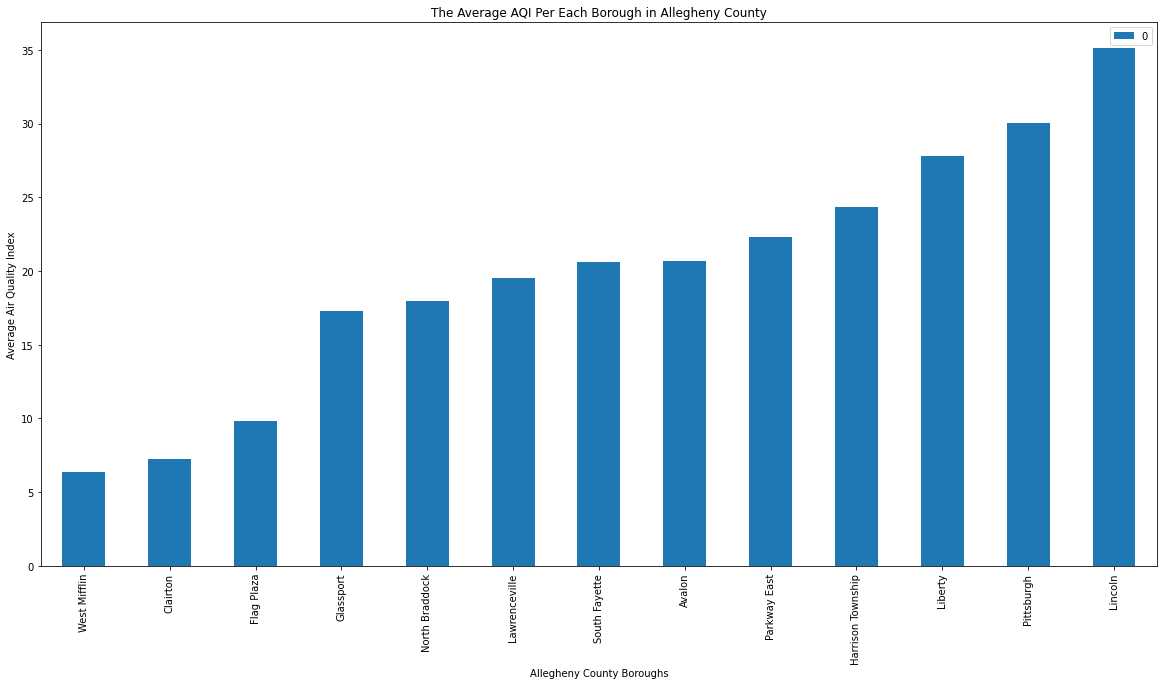

In [120]:
# width = [1,1,1,1,1,1,1,1,1,1,1,1,1]
graph = df.plot(kind="bar", figsize=(20,10), title="The Average AQI Per Each Borough in Allegheny County")
plt.legend(bbox_to_anchor=(1,1))
graph.set(xlabel="Allegheny County Boroughs", ylabel="Average Air Quality Index")


The conclusion from the Air Quality Index dataset and through the calculations I did, West Mifflin is considered to be the best area (or site) in Allegheny County. West Mifflin had the lowest daily average for AQI, having a mean of only 6.34. To compare, the worst area in Allegheny in relation to air pollution is Lincoln. Lincoln has an average AQI value of 35.05. Although all the sites are in the range of 0 to 50, which is considered to be "good air quality," more risk is posed when the values get closer to 50. For West Mifflin to have an average AQI of 6.34 is quite remarkable as it's extremely close to 0 air pollution. 

## The Best Neighborhood

To combine all of our metrics, we decided to weight each dataset by how much we believed would affect our final result. The Clean Air Act Exemption data set recieved a weight of 1.2, whereas the Air Quality and Illegal Dump site data sets recieved a weight of 1.4 each. First, we all created a copy of our dataframe to include our new values. The new values are calculated by taking the number for the site, dividing it by the total and multiplying it by the weight. These are the values from each data set that we would add together to form a conclusion on the best neighborhood.

## Clean Air Act Exemptions

In [121]:
# copy dataframe
FinalExemptions = pd.DataFrame(data=num_exemptions)

# start row count, add weight to each data point
count = 0
while (count < 54):
    FinalExemptions.iloc[count, 0] = (FinalExemptions.iloc[count, 0] / 159.0) * 1.2
    count = count + 1

# add neighborhoods with 0 exemptions
names = ["Allegheny Center","Allegheny West","Arlington","Arlington Heights","Banksville","Bedford Dwellings","Bon Air","California-Kirkbride","Chateau","East Carnegie","East Hills","Fairywood","Fineview","Friendship","Garfield","Glen Hazel","Highland Park","Larimer","Manchester","Morningside","Mount Oliver","New Homestead","Northview Heights","Perry North","Perry South","Point Breeze","Point Breeze North","Ridgemont","Spring Garden","Spring Hill-City View","St. Clair","Stanton Heights","Summer Hill","Terrace Village","Upper Hill","Windgap"]
for name in names:
    FinalExemptions.loc[name] = [0]

FinalExemptions

,Shape
Neighborhood,
Allentown,0.007547
Beechview,0.037736
Beltzhoover,0.007547
Bloomfield,0.060377
Bluff,0.007547
...,...
Stanton Heights,0.000000
Summer Hill,0.000000
Terrace Village,0.000000


## Illegal Dump Sites

In [122]:
# dataframe of float values
neighborhoods = filtered_ds["Neighborhood"].value_counts()
neighborhoods = neighborhoods.astype(float)

# iterates through list of neighborhoods, finding the percentage of dumpsites and amount of trash out of the total, and applies weight 
count = 0;
for row in filtered_ds["Neighborhood"].value_counts():
    row = row / filtered_ds['Neighborhood'].value_counts().sum() * 1.4
    for r in total_trash:
        r = r / total_trash.sum() * 1.4
        total = row + r
        neighborhoods[count] = total # puts value in dataset
    count = count + 1
neighborhoods.sort_values(ascending=True) # sorts in ascending order

Downtown              0.005536
Strip District        0.005536
Point Breeze North    0.005536
Sharpsburg            0.005536
Penn Hills            0.005536
                        ...   
Greenfield            0.052047
Carrick               0.066001
Beltzhoover           0.084605
Perry South           0.121815
Hazelwood             0.156698
Name: Neighborhood, Length: 77, dtype: float64

## Air Quality in Site

In [129]:
# make a deep copy of my dataframe
new_df = df.copy(deep=True)

# start a column count, iterate through each column with our weight given (0.4), put values in our new dataframe
row = 0
while (row < 13):
    new_df.iloc[row, 0] = (new_df.iloc[row,0] / 100) * 1.4
    row = row + 1

# print dataframe
new_df

,0
West Mifflin,0.088698
Clairton,0.101830
Flag Plaza,0.137943
Glassport,0.241856
North Braddock,0.251741
Lawrenceville,0.273077
South Fayette,0.288827
Avalon,0.289442
Parkway East,0.312537
Harrison Township,0.341169


In [130]:
# flip the dataframe
new_df1 = pd.melt(new_df)
new_df2 = new_df1.groupby(by="variable")

## Final Metric

To combine all the data into one final data set, we had to manually input the illegal dump site values as well as the air quality values. For the illegal dump site values, some of the values given combined neighborhoods and also the individual versions of those values, so we excluded the combined values. The air quality data set had 13 sites that were considered boroughs, we manually found the neighborhoods in the boroughs to figure out which values match which neighborhood. For both the air quality and illegal dump site data sets, we placed a "NaN" value in all the other neighborhoods not provided with values. 

In [137]:
finalD = pd.read_csv("finalDataSet.csv")
finald = finalD.drop(columns=["Unnamed: 4", "Unnamed: 5"])
final = finald.drop([90,91,92,93])
final

,Neighborhoods,Indoor Air Act,Dump Site,Air Quality
0,Allegheny Center,0.000000,NaN,0.289442
1,Allegheny West,0.000000,NaN,0.289442
2,Allentown,0.007547,0.019489,0.137943
3,Arlington,0.000000,0.024140,0.137943
4,Arlington Heights,0.000000,NaN,0.137943
...,...,...,...,...
85,Upper Lawrenceville,0.022642,NaN,0.273077
86,West End,0.007547,0.042745,0.137943
87,West Oakland,0.007547,0.014838,0.420111
88,West Wood,0.007547,0.005536,NaN


Text(0, 0.5, 'Total Metric Value')

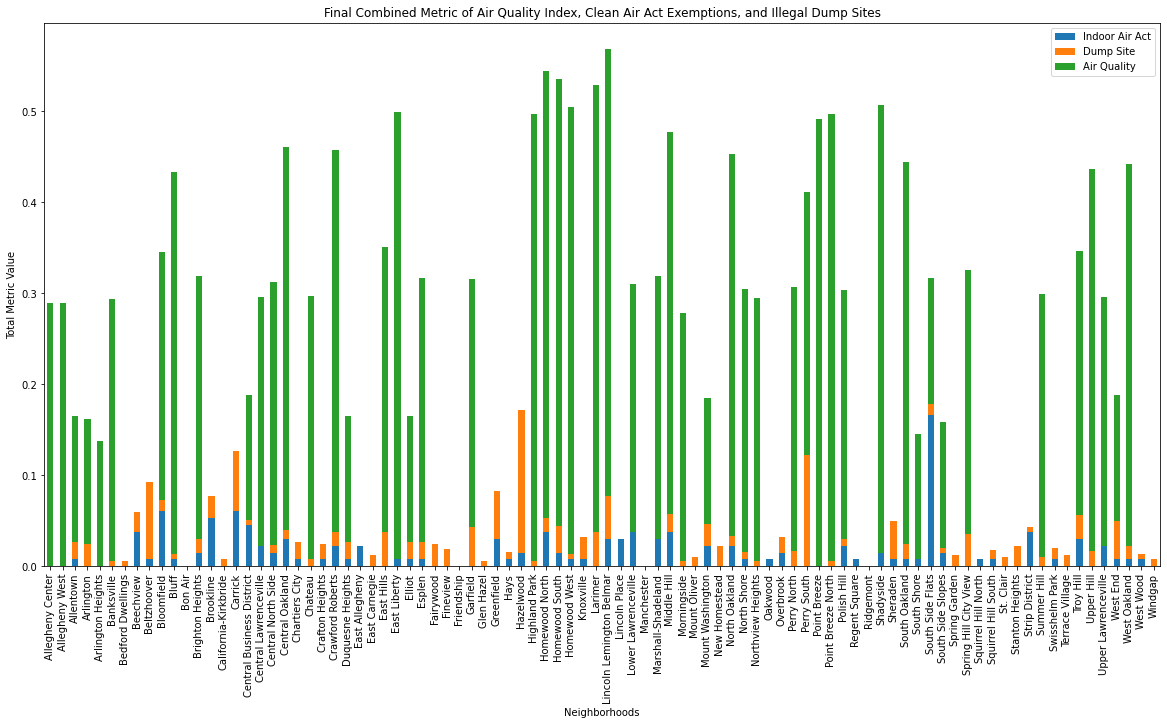

In [132]:
final.set_index("Neighborhoods", drop=True, inplace=True)
final.plot(kind="bar", figsize=(20,10), stacked=True, title="Final Combined Metric of Air Quality Index, Clean Air Act Exemptions, and Illegal Dump Sites")
plt.ylabel("Total Metric Value")

In [133]:
final["Results"] = np.nan

final
        

,Indoor Air Act,Dump Site,Air Quality,Results
Neighborhoods,,,,
Allegheny Center,0.000000,NaN,0.289442,NaN
Allegheny West,0.000000,NaN,0.289442,NaN
Allentown,0.007547,0.019489,0.137943,NaN
Arlington,0.000000,0.024140,0.137943,NaN
Arlington Heights,0.000000,NaN,0.137943,NaN
...,...,...,...,...
Upper Lawrenceville,0.022642,NaN,0.273077,NaN
West End,0.007547,0.042745,0.137943,NaN
West Oakland,0.007547,0.014838,0.420111,NaN


In [134]:
# while loop that combines data into a results column, checks for NaN and then calculates values based on that
i = 0
while i < 90:
    if (math.isnan(final.iat[i,1])) & (math.isnan(final.iat[i,2]) == False):
        final.iat[i,3] = final.iat[i,0] + final.iat[i,2]
    elif math.isnan(final.iat[i,2]) & (math.isnan(final.iat[i,1]) == False):
        final.iat[i,3] = final.iat[i,0] + final.iat[i,1]
    elif (math.isnan(final.iat[i,1])) & math.isnan(final.iat[i,2]):
        final.iat[i,3] = final.iat[i,1]
    else:
        final.iat[i,3] = final.iat[i,0] + final.iat[i,1] + final.iat[i,2]
    i = i + 1

final

,Indoor Air Act,Dump Site,Air Quality,Results
Neighborhoods,,,,
Allegheny Center,0.000000,NaN,0.289442,0.289442
Allegheny West,0.000000,NaN,0.289442,0.289442
Allentown,0.007547,0.019489,0.137943,0.164979
Arlington,0.000000,0.024140,0.137943,0.162083
Arlington Heights,0.000000,NaN,0.137943,0.137943
...,...,...,...,...
Upper Lawrenceville,0.022642,NaN,0.273077,0.295719
West End,0.007547,0.042745,0.137943,0.188235
West Oakland,0.007547,0.014838,0.420111,0.442496


In [135]:
# check if both values are numbers, if the result is less than the highest result value, then drop the row
# ending result is the neighborhood with the lowest value that has data on all three categories
j = 0
minIndex = 0
maxValue = 1

while (j < 90):
    if (math.isnan(final.iat[j, 2]) == False) &  (math.isnan(final.iat[j, 1]) == False):
        if final.iat[j, 3] < maxValue:
            maxValue = final.iat[j, 3]
            minIndex = j
    j = j + 1

final.index[minIndex]

'South Side Slopes'

## Conclusion

Group: We as the Green Team have determined that South Side Slopes is the best neighborhood in Pittsburgh. The three datasets of clean air exemptions, illegal dump sites, and air quality in site support its ranking. It contains few exemptions from the Clean Indoor Air Act compared to the remaining neighborhoods, providing a safe and healthy space for individuals in recreation areas. It has a low number of estimated tons of garbage and low number of illegal dumping sites, which prevents air, soil, and water pollution. The neighborhood is rated with a low air quality index, resulting in a lower effect of air pollution on living things and a relatively high air quality. Weighing each metric and comparing the ninety neighborhoods, South Side Slopes has the minimum total metric value, with figures from all three datasets. For the concern of pollution in Pittsburgh, South Side Slopes would be the best neighborhood for residency.

Magda: South Side Slopes was not one of the thirty-six neighborhoods that did not have an exemption from the Clean Indoor Air Act. Two clean air exemptions are located within its borders. Though not exceptionally ranked, the neighborhood was, in terms of those that did have an exemption, placed fairly low. Purely from the exemption dataset the neighborhood would not be considered a top contender. In terms of the combination of the three metrics, for the safety of the citizens and cleanliness of the environment, I would agree that Southside Slopes is one of the best neighborhoods.

Daisy: Southside Slopes was one of the neighborhoods with the least number of illegal dumps. From adding up the individual number of dump sites at the neighborhood, it only had one. It also had five tons of trash, which is toward the lower end of the range. Altough it was not the best neighborhood by my metric alone, it does seem to be one of neighborhoods that is relatively better. So combined with the data from the other metrics, I would agree that Southside Slopes is the best neighborhood.

Nikhita: We ended up excluding three sites: West Mifflin, Clairton, and Glassport, due to the fact that these boroughs were too far down the river and not near any of the neighborhoods we were observing. With excluding those sites, from my data alone, the best site with the lowest air quality index value of around 9.83 was Flag Plaza. South Side Slopes is a neighborhood in the Flag Plaza borough so I do agree that this is the best neighborhood. Also speaking environmentally wise, South Side Slopes is heavily populated but the area is kept quite clean. Overall, I think including values from each data set to decide our final best neighborhood makes our decision more accurate.